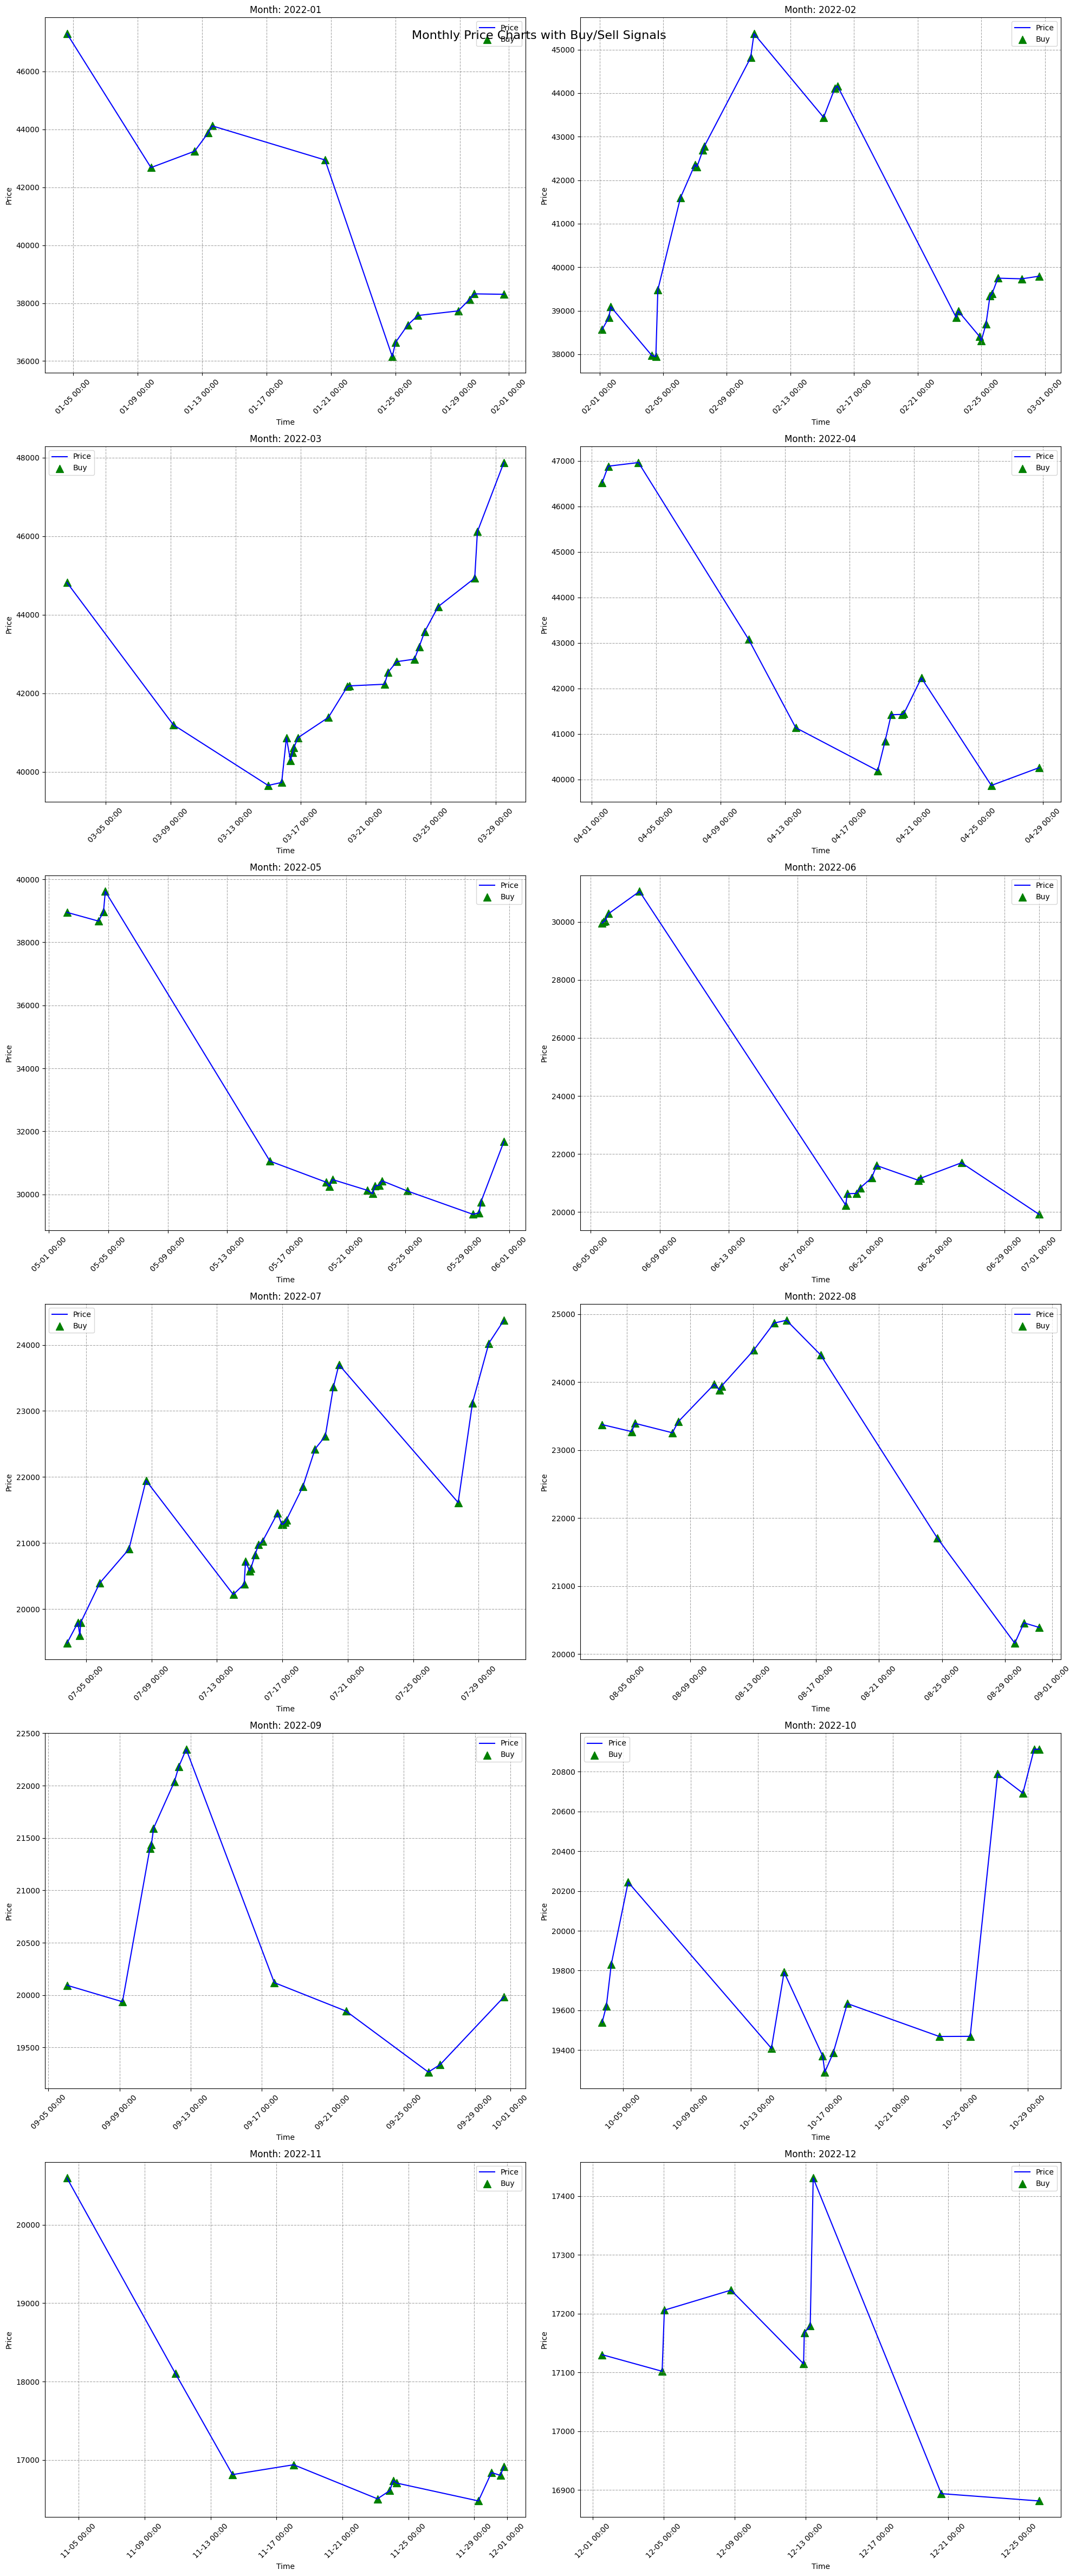

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def plot_monthly_trading_data(file_path):
    # 讀取CSV
    df = pd.read_csv(file_path)
    
    # 將timestamp轉換為datetime格式
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # 添加年月列用於分組
    df['year_month'] = df['timestamp'].dt.strftime('%Y-%m')
    
    # 獲取所有不同的年月
    months = df['year_month'].unique()
    
    # 計算需要的行列數
    n_months = len(months)
    n_cols = 2  # 每行顯示2個圖
    n_rows = (n_months + 1) // 2  # 向上取整
    
    # 創建子圖
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8*n_rows))
    fig.suptitle('Monthly Price Charts with Buy/Sell Signals', fontsize=16)
    
    # 將axes轉換為1維數組，方便索引
    axes = axes.ravel() if n_months > 1 else [axes]
    
    # 為每個月繪製圖表
    for idx, month in enumerate(months):
        ax = axes[idx]
        month_data = df[df['year_month'] == month]
        
        # 繪製價格線
        ax.plot(month_data['timestamp'], month_data['price'], color='blue', label='Price')
        
        # 標記買入點
        buy_points = month_data[month_data['is_buy'] == True]
        if not buy_points.empty:
            ax.scatter(buy_points['timestamp'], 
                      buy_points['price'], 
                      color='green', 
                      marker='^', 
                      s=100, 
                      label='Buy')
        
        # 標記賣出點
        sell_points = month_data[month_data['is_buy'] == False]
        if not sell_points.empty:
            ax.scatter(sell_points['timestamp'], 
                      sell_points['price'], 
                      color='red', 
                      marker='v', 
                      s=100, 
                      label='Sell')
        
        # 設置子圖格式
        ax.set_title(f'Month: {month}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Price')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend()
        
        # 自動調整x軸日期格式
        ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d %H:%M'))
    
    # 隱藏多餘的子圖
    for idx in range(n_months, len(axes)):
        axes[idx].set_visible(False)
    
    # 調整布局
    plt.tight_layout()
    plt.show()

# 使用函數
file_path = '/Users/mouyasushi/Desktop/quantDevops/Backtest_Performance/Alpha-Research/sample_output/KeltnerChannel/1h_KeltnerChannel_binance_BTCUSDT_2022-01-01_2022-12-26/1h_KeltnerChannel_Keltner Channel Strategy with MACD_binance_BTCUSDT_2022-01-01_2022-12-26_20250201_182839.csv'
plot_monthly_trading_data(file_path)

### Long and short 

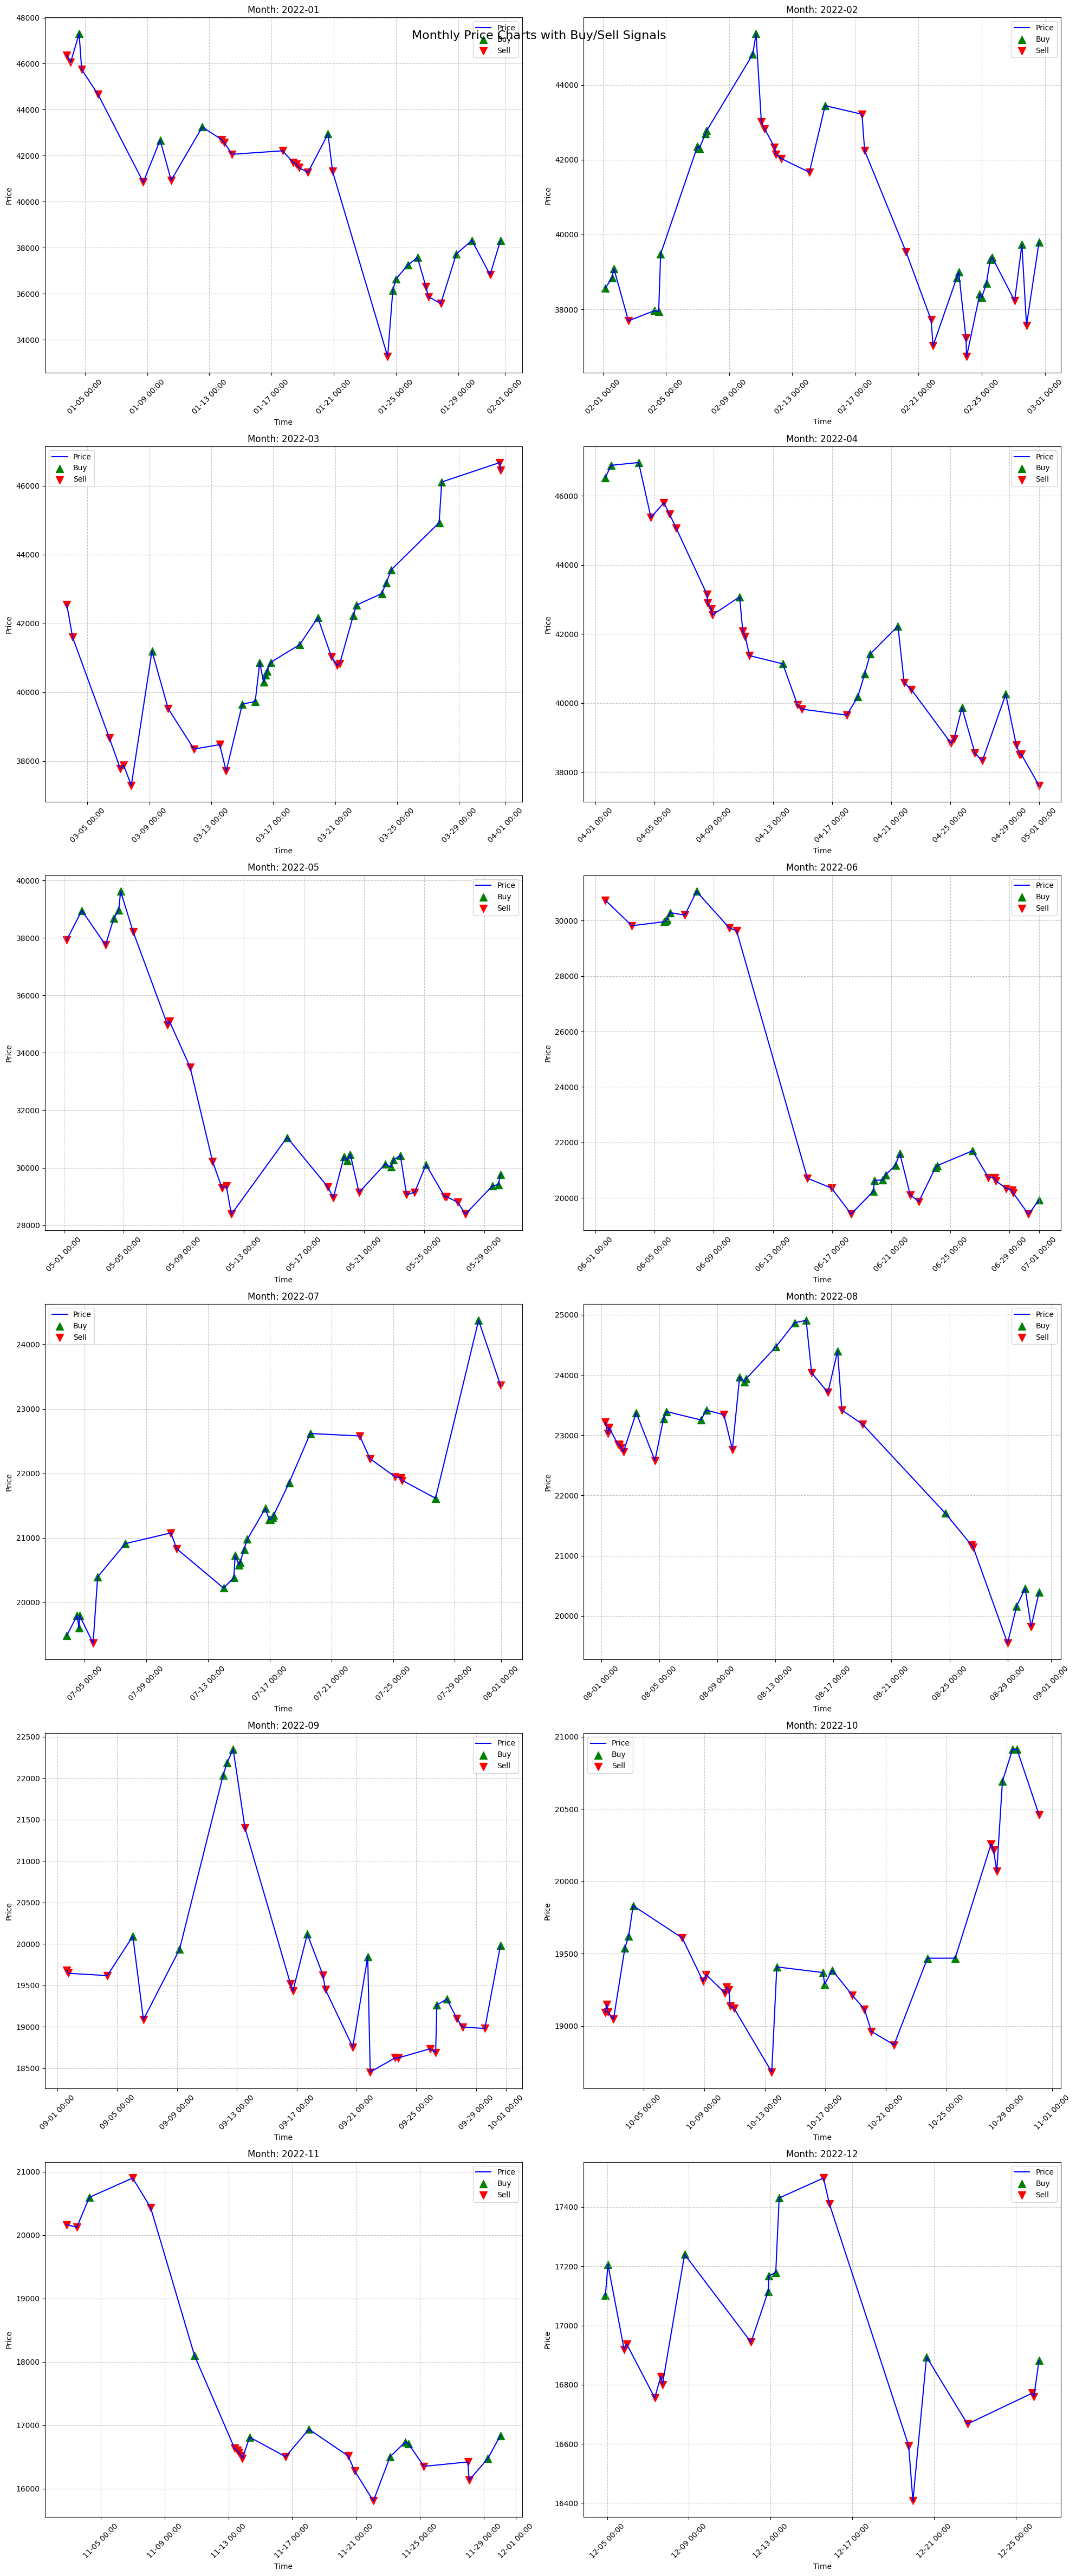

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def plot_monthly_trading_data(file_path):
    # 讀取CSV
    df = pd.read_csv(file_path)
    
    # 將timestamp轉換為datetime格式
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # 添加年月列用於分組
    df['year_month'] = df['timestamp'].dt.strftime('%Y-%m')
    
    # 獲取所有不同的年月
    months = df['year_month'].unique()
    
    # 計算需要的行列數
    n_months = len(months)
    n_cols = 2  # 每行顯示2個圖
    n_rows = (n_months + 1) // 2  # 向上取整
    
    # 創建子圖
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8*n_rows))
    fig.suptitle('Monthly Price Charts with Buy/Sell Signals', fontsize=16)
    
    # 將axes轉換為1維數組，方便索引
    axes = axes.ravel() if n_months > 1 else [axes]
    
    # 為每個月繪製圖表
    for idx, month in enumerate(months):
        ax = axes[idx]
        month_data = df[df['year_month'] == month]
        
        # 繪製價格線
        ax.plot(month_data['timestamp'], month_data['price'], color='blue', label='Price')
        
        # 標記買入點
        buy_points = month_data[month_data['is_buy'] == True]
        if not buy_points.empty:
            ax.scatter(buy_points['timestamp'], 
                      buy_points['price'], 
                      color='green', 
                      marker='^', 
                      s=100, 
                      label='Buy')
        
        # 標記賣出點
        sell_points = month_data[month_data['is_buy'] == False]
        if not sell_points.empty:
            ax.scatter(sell_points['timestamp'], 
                      sell_points['price'], 
                      color='red', 
                      marker='v', 
                      s=100, 
                      label='Sell')
        
        # 設置子圖格式
        ax.set_title(f'Month: {month}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Price')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend()
        
        # 自動調整x軸日期格式
        ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d %H:%M'))
    
    # 隱藏多餘的子圖
    for idx in range(n_months, len(axes)):
        axes[idx].set_visible(False)
    
    # 調整布局
    plt.tight_layout()
    plt.show()

# 使用函數
file_path = '/Users/mouyasushi/Desktop/quantDevops/Backtest_Performance/Alpha-Research/sample_output/KeltnerChannel/1h_KeltnerChannel_binance_BTCUSDT_2022-01-01_2022-12-26/1h_KeltnerChannel_Keltner Channel Strategy with MACD - Long and Short_binance_BTCUSDT_2022-01-01_2022-12-26_20250202_002441.csv'
plot_monthly_trading_data(file_path)

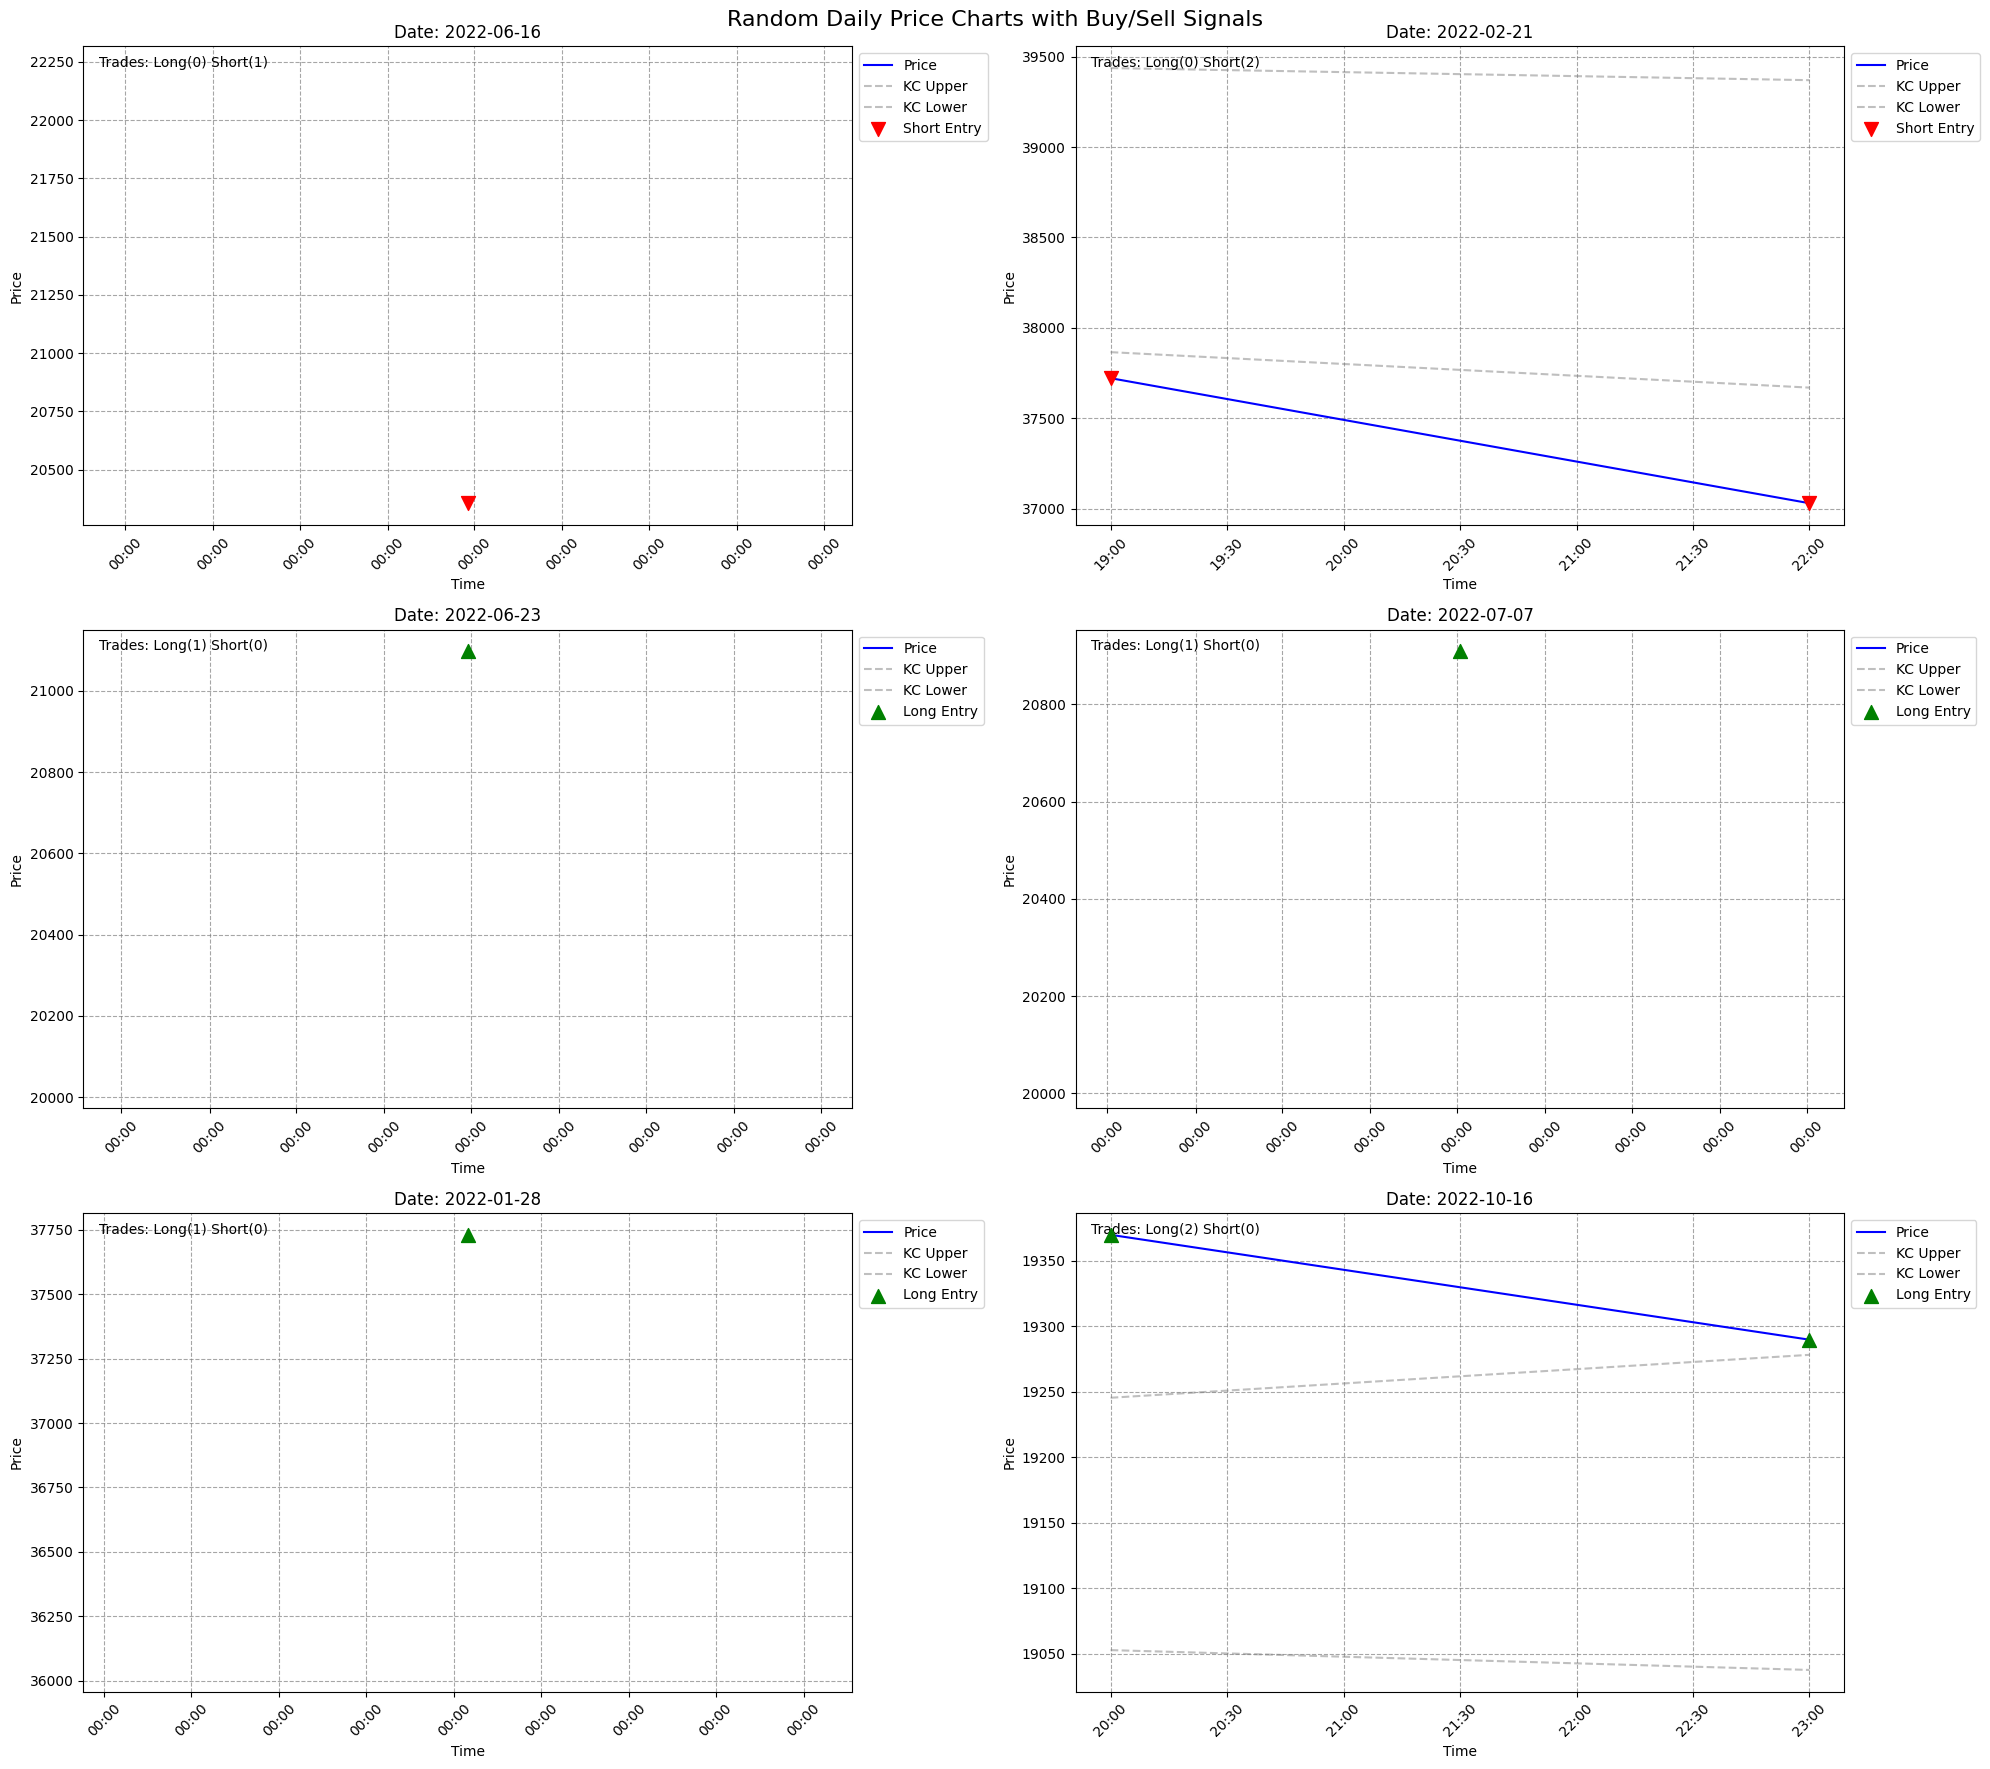

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

def plot_random_trading_days(file_path, num_days=6):
    # Read CSV
    df = pd.read_csv(file_path)
    
    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Add date column for grouping
    df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')
    
    # Get all unique dates and randomly select num_days
    all_dates = df['date'].unique()
    selected_dates = np.random.choice(all_dates, min(num_days, len(all_dates)), replace=False)
    
    # Calculate required rows and columns
    n_days = len(selected_dates)
    n_cols = 2  # 2 plots per row
    n_rows = (n_days + 1) // 2  # Round up division
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
    fig.suptitle('Random Daily Price Charts with Buy/Sell Signals', fontsize=16)
    
    # Convert axes to 1D array for easier indexing
    axes = axes.ravel() if n_days > 1 else [axes]
    
    # Plot for each selected day
    for idx, date in enumerate(selected_dates):
        ax = axes[idx]
        day_data = df[df['date'] == date]
        
        # Plot price line
        ax.plot(day_data['timestamp'], 
                day_data['price'], 
                color='blue', 
                label='Price',
                linewidth=1.5)
        
        # Plot Keltner Channels
        ax.plot(day_data['timestamp'], 
                day_data['kc_upper'], 
                color='gray', 
                linestyle='--', 
                alpha=0.5,
                label='KC Upper')
        ax.plot(day_data['timestamp'], 
                day_data['kc_lower'], 
                color='gray', 
                linestyle='--', 
                alpha=0.5,
                label='KC Lower')
        
        # Mark long entry points
        long_points = day_data[(day_data['is_buy'] == True) & (day_data['is_short'] == False)]
        if not long_points.empty:
            ax.scatter(long_points['timestamp'], 
                      long_points['price'], 
                      color='green', 
                      marker='^', 
                      s=100, 
                      label='Long Entry',
                      zorder=5)
        
        # Mark short entry points
        short_points = day_data[(day_data['is_buy'] == False) & (day_data['is_short'] == True)]
        if not short_points.empty:
            ax.scatter(short_points['timestamp'], 
                      short_points['price'], 
                      color='red', 
                      marker='v', 
                      s=100, 
                      label='Short Entry',
                      zorder=5)
        
        # Format subplot
        ax.set_title(f'Date: {date}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Price')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        
        # Format x-axis to show hours
        ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
        
        # Set y-axis limits with some padding
        if not day_data.empty:
            price_min = min(day_data['price'].min(), day_data['kc_lower'].min())
            price_max = max(day_data['price'].max(), day_data['kc_upper'].max())
            price_range = price_max - price_min
            ax.set_ylim([
                price_min - price_range * 0.05,  # 5% padding
                price_max + price_range * 0.05
            ])
        
        # Add day's trading statistics
        if not day_data.empty:
            long_count = len(long_points)
            short_count = len(short_points)
            stats_text = f'Trades: Long({long_count}) Short({short_count})'
            ax.text(0.02, 0.98, stats_text,
                   transform=ax.transAxes,
                   verticalalignment='top',
                   fontsize=10)
    
    # Hide empty subplots
    for idx in range(n_days, len(axes)):
        axes[idx].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    return fig

# Example usage
if __name__ == "__main__":
    file_path = '/Users/mouyasushi/Desktop/quantDevops/Backtest_Performance/Alpha-Research/sample_output/KeltnerChannel/1h_KeltnerChannel_binance_BTCUSDT_2022-01-01_2022-12-26/1h_KeltnerChannel_Keltner Channel Strategy with MACD - Long and Short_binance_BTCUSDT_2022-01-01_2022-12-26_20250202_002441.csv'
    fig = plot_random_trading_days(file_path, num_days=6)  # Plot 6 random days
    plt.show()